In [32]:
import pandas as pd

# Define the data 
data = {
    "Name": ["Avery Bradley", "Jae Crowder", "John Holland", "R.J. Hunter", "Jonas Jerebko", "Amir Johnson", 
             "Jordan Mickey", "Kelly Olynyk", "Terry Rozier", "Marcus Smart", "Jared Sullinger", 
             "Isaiah Thomas", "Evan Turner", "James Young", "Tyler Zeller"],
    "Team": ["Boston Celtics"] * 15,
    "Number": [0, 99, 30, 28, 8, 90, 55, 41, 12, 36, 7, 4, 11, 13, 44],
    "Position": ["PG", "SF", "SG", "SG", "PF", "PF", "PF", "C", "PG", "PG", "C", "PG", "SG", "SG", "C"],
    "Age": [25, 25, 27, 22, 29, 29, 21, 25, 22, 22, 24, 27, 27, 20, 26],
    "Height": [164, 175, 156, 172, 170, 165, 159, 173, 163, 164, 167, 177, 165, 160, 175],
    "Weight": [180, 235, 205, 185, 231, 240, 235, 238, 190, 220, 260, 185, 220, 215, 253],
    "College": ["Texas", "Marquette", "Boston University", "Georgia State", "", "", "LSU", "Gonzaga", 
                "Louisville", "Oklahoma State", "Ohio State", "Washington", "Ohio State", "Kentucky", 
                "North Carolina"],
    "Amount": [7730337, 6796117, 6796117, 1148640, 5000000, 12000000, 1170960, 2165160, 1824360, 3431040, 
               2569260, 6912869, 3425510, 1749840, 2616975]
}

# DataFrame
df = pd.DataFrame(data)
df


,Name,Team,Number,Position,Age,Height,Weight,College,Amount
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,175,235,Marquette,6796117
2,John Holland,Boston Celtics,30,SG,27,156,205,Boston University,6796117
3,R.J. Hunter,Boston Celtics,28,SG,22,172,185,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8,PF,29,170,231,,5000000
5,Amir Johnson,Boston Celtics,90,PF,29,165,240,,12000000
6,Jordan Mickey,Boston Celtics,55,PF,21,159,235,LSU,1170960
7,Kelly Olynyk,Boston Celtics,41,C,25,173,238,Gonzaga,2165160
8,Terry Rozier,Boston Celtics,12,PG,22,163,190,Louisville,1824360
9,Marcus Smart,Boston Celtics,36,PG,22,164,220,Oklahoma State,3431040


In [16]:
# Calculating the total number of employees
total_employees = len(df)

# Calculating the number of employees per team
team_distribution = df['Team'].value_counts()

# Calculating the percentage split for each team
team_percentage = (team_distribution / total_employees) * 100

# Combining the distribution and percentage into a single DataFrame
distribution_df = pd.DataFrame({
    "Team": team_distribution.index,
    "Number of Employees": team_distribution.values,
    "Percentage (%)": team_percentage.values
})

distribution_df

,Team,Number of Employees,Percentage (%)
0,Boston Celtics,15,100.0


In [4]:

# Calculating the number of employees per position
position_distribution = df['Position'].value_counts()

# Calculating the percentage split for each position
position_percentage = (position_distribution / len(df)) * 100

# Combining the distribution and percentage into a single DataFrame
position_df = pd.DataFrame({
    "Position": position_distribution.index,
    "Number of Employees": position_distribution.values,
    "Percentage (%)": position_percentage.values
})

position_df

,Position,Number of Employees,Percentage (%)
0,PG,4,26.666667
1,SG,4,26.666667
2,PF,3,20.000000
3,C,3,20.000000
4,SF,1,6.666667


In [17]:
# Defining age bins and labels
bins = [20, 24, 29, 34]
labels = ['20-22', '23-22', '30-34']

# Creating a new column 'Age Group' based on the bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of employees in each age group
age_group_distribution = df['Age Group'].value_counts()

# Identify the predominant age group
predominant_age_group = age_group_distribution.idxmax()
predominant_age_group_count = age_group_distribution.max()

age_group_distribution, predominant_age_group, predominant_age_group_count

(Age Group
 23-27    8
 20-22    5
 28-30    2
 Name: count, dtype: int64,
 '23-27',
 8)

In [38]:
# Grouping the data by position and sum up the salaries
grouped = df.groupby(['Position','Team'])['Amount'].sum()  # Assuming 'Amount' represents the salary

# Finding the position with the highest salary expenditure
highest_salary_position = grouped.idxmax()
highest_salary = grouped.max()

highest_salary_position, highest_salary


(('PG', 'Boston Celtics'), 19898606)

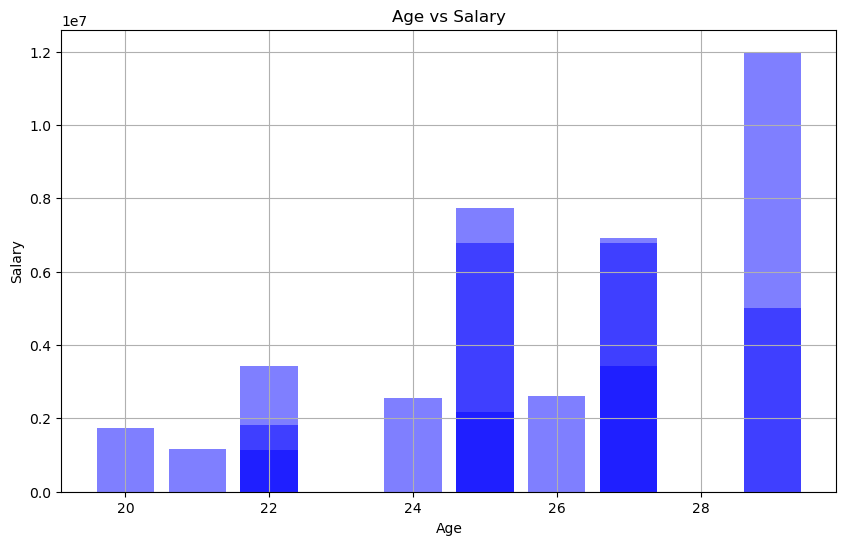

As age increases, there's a tendency for salaries to increase as well.


In [53]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Amount'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

# Show the plot
plt.grid(True)
plt.show()
print("As age increases, there's a tendency for salaries to increase as well.")


In [44]:

# Calculate the Pearson correlation coefficient
correlation = df['Age'].corr(df['Amount'])
print("Pearson correlation coefficient between age and salary:", correlation)




Pearson correlation coefficient between age and salary: 0.7052395617176469


# Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

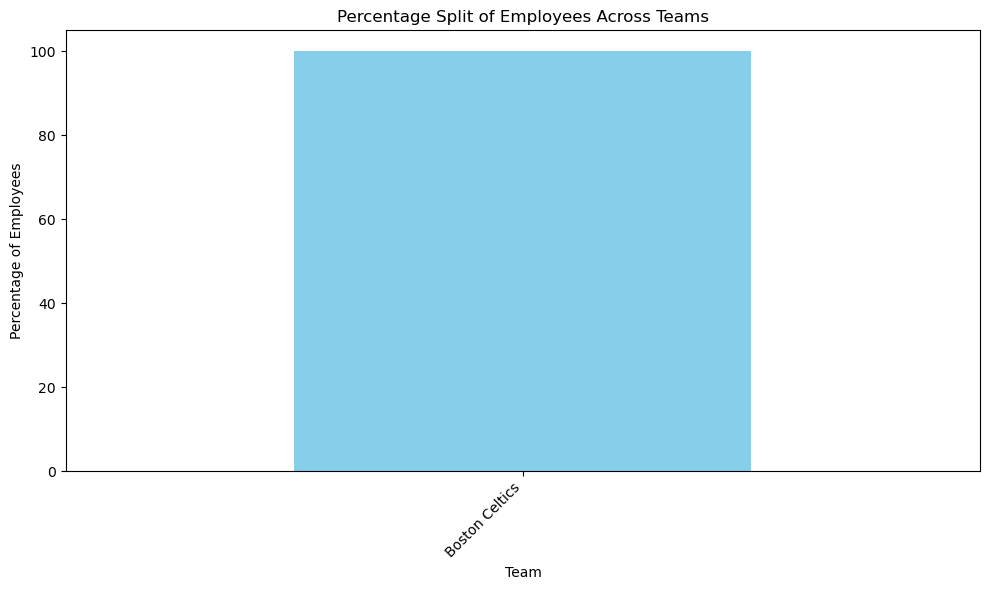

In [56]:
import matplotlib.pyplot as plt

# Count the number of employees in each team
team_counts = df['Team'].value_counts()

# Calculate the percentage split relative to the total number of employees
total_employees = team_counts.sum()
percentage_split = (team_counts / total_employees) * 100

# Visualize the distribution
plt.figure(figsize=(10, 6))
percentage_split.plot(kind='bar', color='skyblue')
plt.title('Percentage Split of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Segregation of employees based on their positions within the company

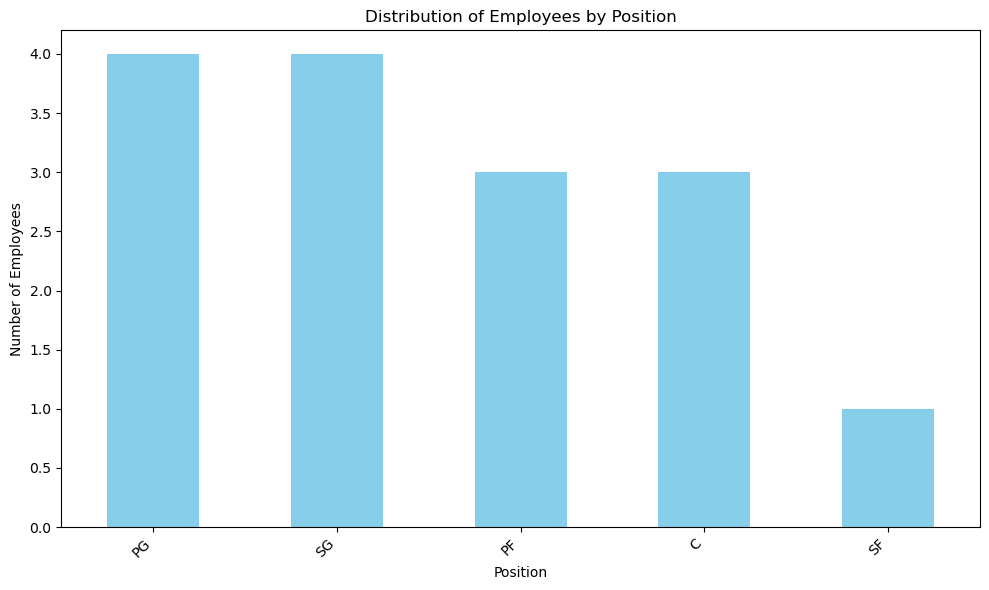

In [57]:
# Count the number of employees in each position
position_counts = df['Position'].value_counts()

# Visualize the distribution
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#  Identifying the predominant age group among employees 

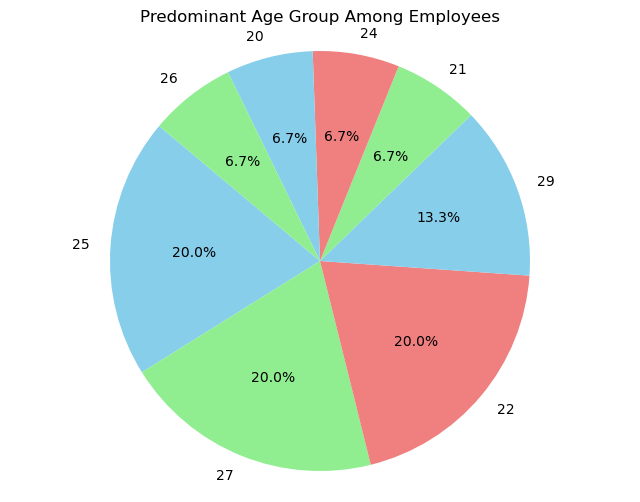

In [66]:
import matplotlib.pyplot as plt

# Determine the predominant age group
predominant_age_group = df['Age'].mode()[0]

# Count the number of employees in each age group
age_group_counts = df['Age'].value_counts()

# Visualize the predominant age group using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Predominant Age Group Among Employees')
plt.axis('equal')
plt.show()


# Discovering which team and position have the highest salary expenditure 


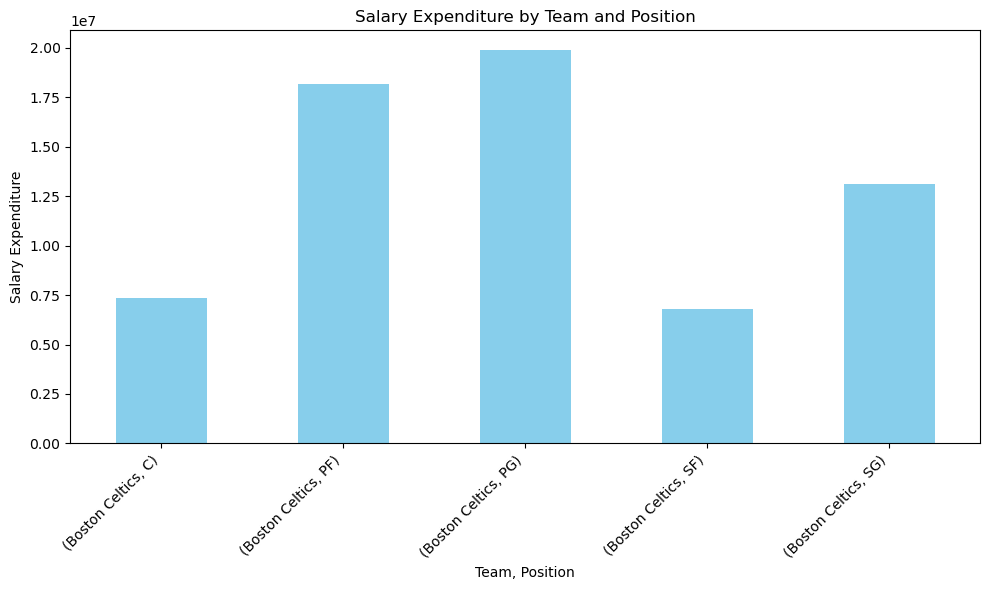

Team with the highest salary expenditure: Boston Celtics
Position with the highest salary expenditure: PG


In [67]:
# Group the data by team and position and sum up the salaries
grouped_salary = df.groupby(['Team', 'Position'])['Amount'].sum()

# Find the team and position with the highest salary expenditure
highest_salary_expenditure = grouped_salary.idxmax()
highest_salary = grouped_salary.max()

team_with_highest_salary, position_with_highest_salary = highest_salary_expenditure

# Visualize the result
plt.figure(figsize=(10, 6))
grouped_salary.plot(kind='bar', color='skyblue')
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Team, Position')
plt.ylabel('Salary Expenditure')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Team with the highest salary expenditure:", team_with_highest_salary)
print("Position with the highest salary expenditure:", position_with_highest_salary)